# Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection   import train_test_split
from sklearn.model_selection   import GridSearchCV
from sklearn.metrics           import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing     import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.decomposition     import PCA
from sklearn.svm               import SVC
from scipy.stats             import zscore

%matplotlib inline

In [2]:
data = pd.read_csv('vehicle.csv')

In [3]:
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
data.sample(5)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
72,92,39.0,91.0,191.0,62.0,8,176.0,37.0,21.0,137,196.0,466.0,151.0,67.0,3.0,23.0,192.0,200,car
785,85,43.0,66.0,123.0,56.0,6,148.0,46.0,19.0,145,166.0,319.0,171.0,85.0,6.0,11.0,179.0,182,bus
709,95,42.0,96.0,197.0,65.0,9,178.0,37.0,21.0,141,199.0,474.0,149.0,67.0,1.0,29.0,193.0,200,car
323,98,51.0,96.0,203.0,66.0,10,188.0,35.0,22.0,157,207.0,533.0,231.0,68.0,10.0,1.0,191.0,199,car
723,105,46.0,100.0,195.0,61.0,9,193.0,34.0,22.0,150,207.0,557.0,161.0,65.0,5.0,9.0,194.0,202,car


### checking basic statistics like mean, standard deviation, min, max for each features

In [5]:
data.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


### checking information like number of data, data type of each features

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

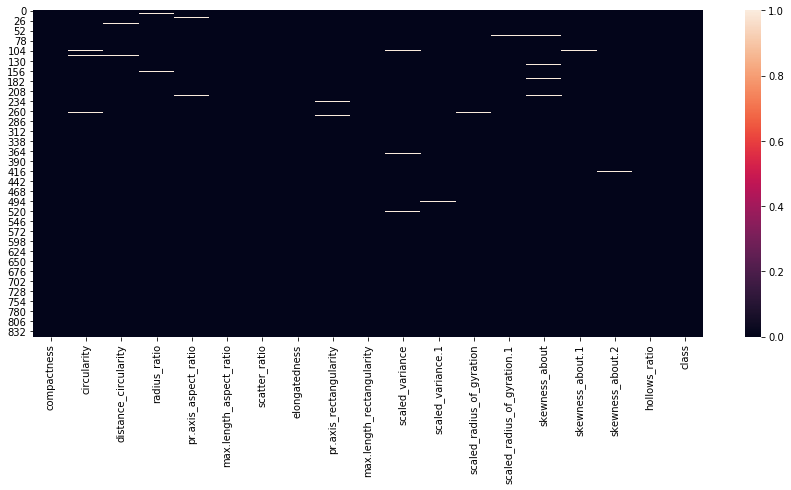

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isna())

### filling outliers with nan and will replace nan's with median later stage

In [8]:
for column in data.drop('class', axis=1).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = float(Q1 - 1.5 * IQR)
    upper_bound = float(Q3 + 1.5 * IQR)
    data.loc[data[column] > upper_bound, column] = np.nan
    data.loc[data[column] < lower_bound, column] = np.nan

### creating heatmap to identify missing values, all white spots are missing values in the data frame

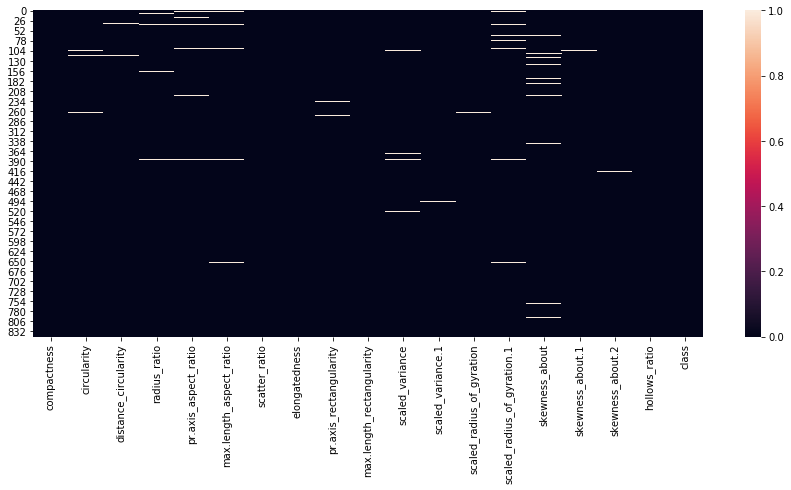

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isna())

### Filling missing values with median of the column

In [10]:
vehicles = data.fillna(value=data.median())

### Verifying if there is any missing values present or not

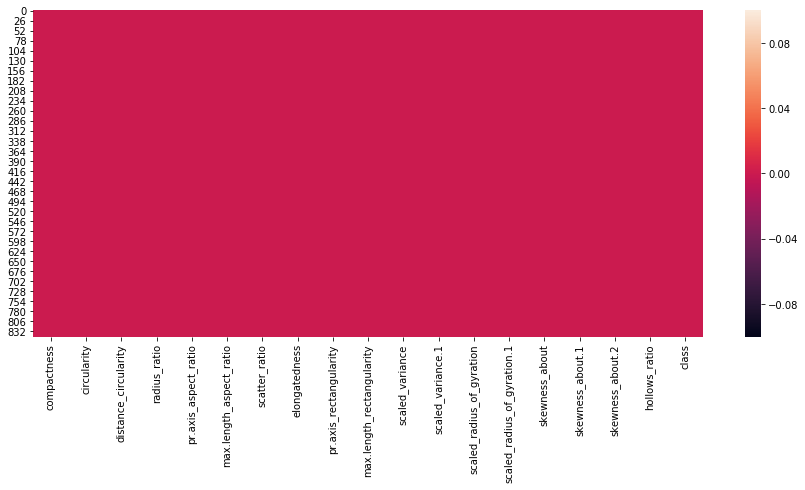

In [11]:
plt.figure(figsize=(15,6))
sns.heatmap(vehicles.isna())

### Plotting box plots for each features to check the spread, Inter Quartile rangeand outliers

In [12]:
plt_data = vehicles.drop(columns='class', axis=1)

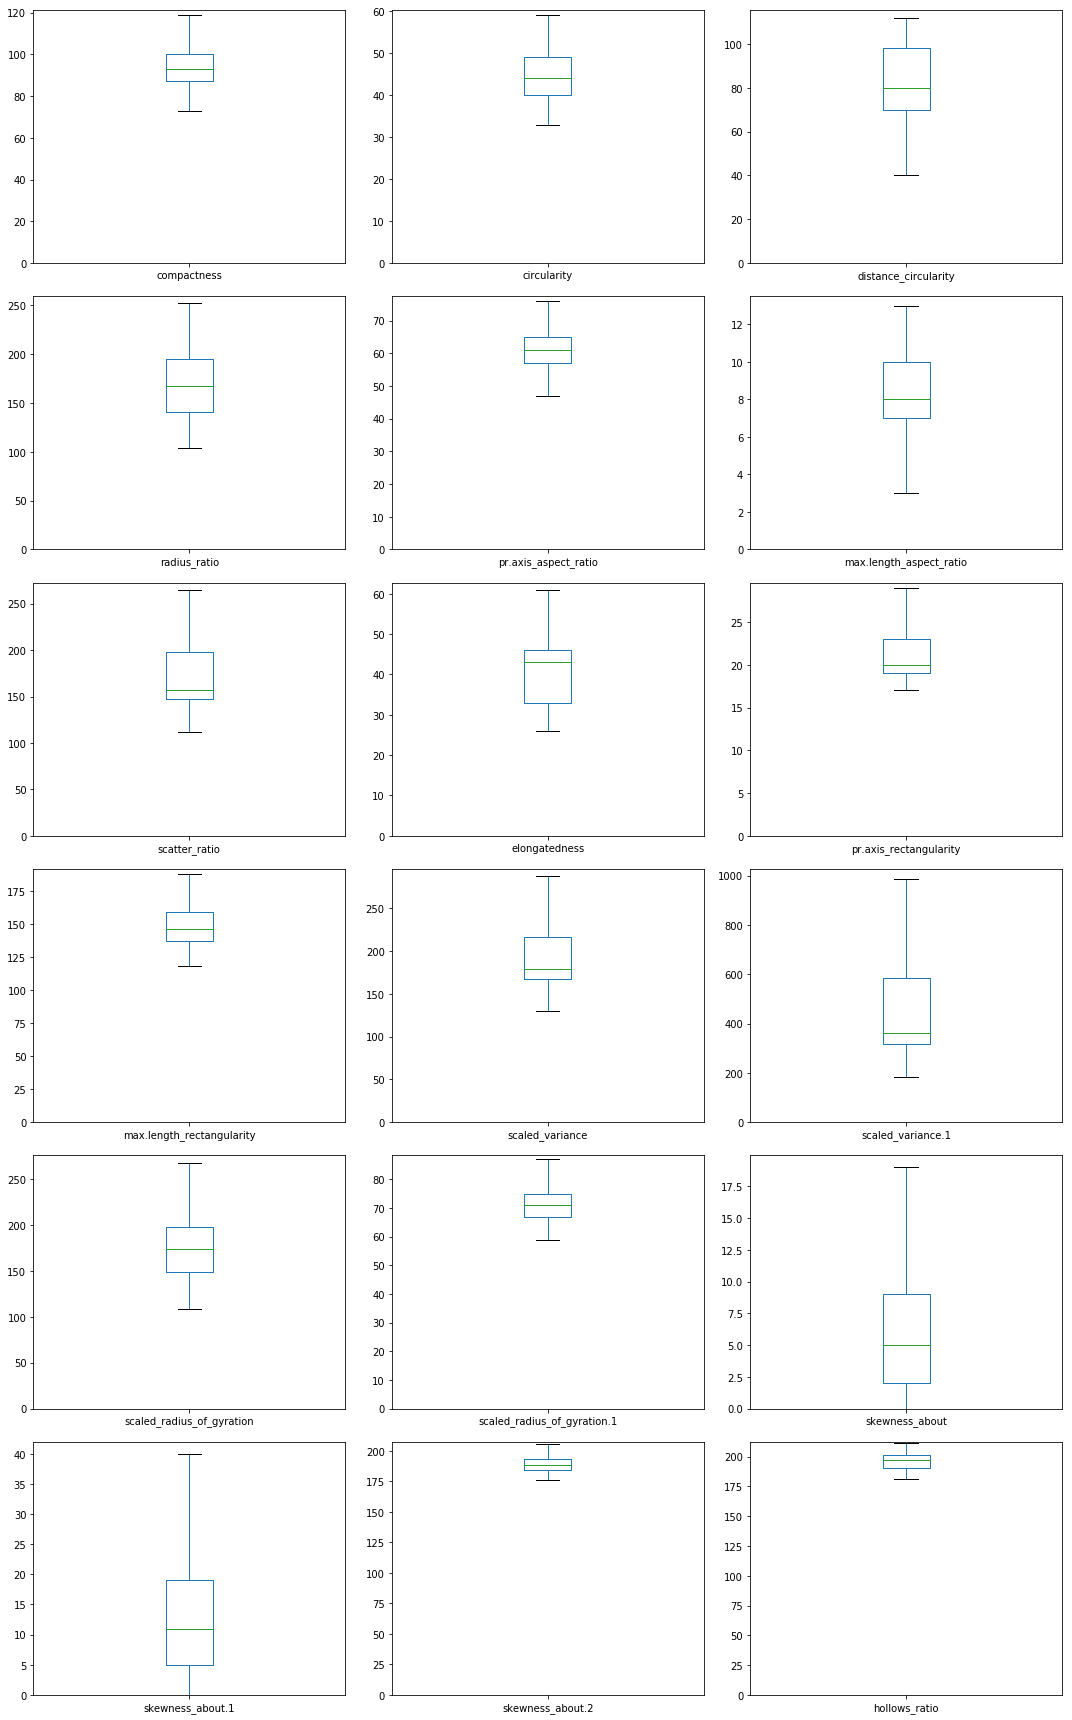

In [13]:
k = len(plt_data.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 4))

for i, (name, col) in enumerate(plt_data.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    ax2 = col.plot.box(ax=ax)
    ax2.set_ylim(0)

fig.tight_layout()

### from above box plots it is observed that: 'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_radius_of_gyration.1' have lot of outliers 

### also 'skewness_about ','scaled_variance','scaled_variance.1', 'skewness_about.1' have some outliers

### Getting data set without output

In [14]:
vehicles = vehicles.drop(columns='class', axis=1)

# Understanding the attributes - Find the relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

### Plotting the pearson correlation matix in a heatmap to check the correlation between all the features

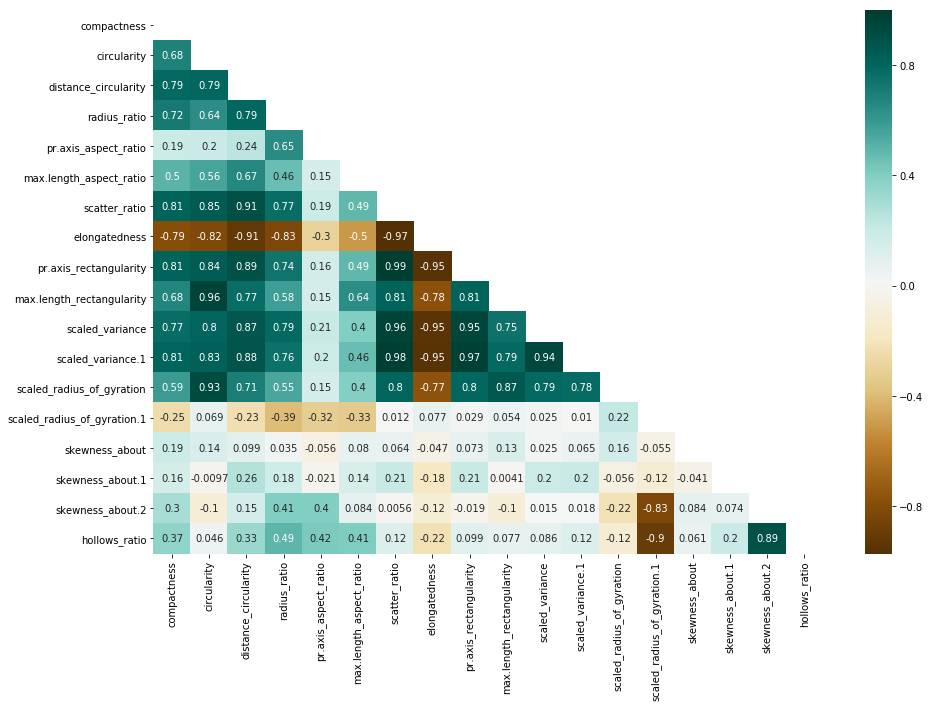

In [15]:
data_corr = vehicles.corr()
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15, 10))
sns.heatmap(data_corr, 
            xticklabels = vehicles.columns.values,
            yticklabels = vehicles.columns.values,
            annot = True, cmap='BrBG',
            mask = mask);

In [16]:
X = vehicles
y_class = data['class']
print (y_class.head())
lbl_encoder = LabelEncoder()
y = pd.DataFrame(lbl_encoder.fit_transform(data['class']), columns=['class'])
print (y.head())

0    van
1    van
2    car
3    van
4    bus
Name: class, dtype: object
   class
0      2
1      2
2      1
3      2
4      0


### we can use univariate feature selection (like SelectKBest), before the SVM increases the SVM weight attributed to the significant features, and will thus improve classification.

### Running SelectKBest using Chi-Squared Statistics. The intution is, if the feature is independant to the target, it is uninformative to the classification. So we can omit the least important features while training model

In [17]:
bestfeatures = SelectKBest(score_func=chi2, k=18)
fit = bestfeatures.fit(X,y_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print features as per score in descending order

                          Specs         Score
11            scaled_variance.1  12650.956923
6                 scatter_ratio   1255.573812
3                  radius_ratio   1031.464380
10              scaled_variance    888.618013
2          distance_circularity    502.862301
12    scaled_radius_of_gyration    454.017832
15             skewness_about.1    444.111534
7                 elongatedness    326.040858
5       max.length_aspect_ratio    105.409807
14               skewness_about     85.960063
13  scaled_radius_of_gyration.1     81.694508
0                   compactness     59.506366
8        pr.axis_rectangularity     56.522606
1                   circularity     47.685079
17                hollows_ratio     29.277924
9     max.length_rectangularity     24.425818
4          pr.axis_aspect_ratio     19.292819
16             skewness_about.2      2.106312


### Running SelectKBest using F1  Statistics. The intution is, The F-value scores examine if, when we group the numerical feature by the target vector, the means for each group are significantly different.

In [18]:
bestfeatures = SelectKBest(f_classif, k=18)
fit = bestfeatures.fit(X,y_class)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(18,'Score'))  #print features as per score in descending order

                          Specs       Score
7                 elongatedness  147.193850
5       max.length_aspect_ratio  131.426987
6                 scatter_ratio  124.273957
11            scaled_variance.1  115.871362
10              scaled_variance  109.177018
8        pr.axis_rectangularity  108.987974
3                  radius_ratio  104.597819
2          distance_circularity  103.518093
13  scaled_radius_of_gyration.1   94.580821
17                hollows_ratio   58.839221
0                   compactness   45.428131
12    scaled_radius_of_gyration   40.984611
15             skewness_about.1   38.550097
1                   circularity   30.375834
4          pr.axis_aspect_ratio   19.542937
14               skewness_about   12.930488
9     max.length_rectangularity    8.735419
16             skewness_about.2    5.310159


### we can say from above result, that we can ignore 'max.length_rectangularity', 'pr.axis_aspect_ratio', 'skewness_about.2' features as they have lowest score in both Anova F-score and Chi-square statistics. As we are going to use PCA for dimension reduction, I will keep all the feature intact for further analysis.

# Use PCA from scikit learn and elbow plot to find out a reduced number of dimension (which covers more than 95% of the variance)

### splitting data set into 70% for training data and 30% for testing data

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
#scaling data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X_transformed = min_max_scaler.transform(X)
df = pd.DataFrame(X_transformed, columns=X.columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.3, random_state=158)

In [22]:
print ('Shape of X_train data: ',X_train.shape)
print ('Shape of X_test data: ',X_test.shape)
print ('Shape of y_train data: ',y_train.shape)
print ('Shape of y_test data: ',y_test.shape)

Shape of X_train data:  (592, 18)
Shape of X_test data:  (254, 18)
Shape of y_train data:  (592, 1)
Shape of y_test data:  (254, 1)


### creating PCA classifier and fitting it to X_train data

In [23]:
pca = PCA(n_components=len(X_train.columns))
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
X_pca = pca.transform(X_train)

In [25]:
X_pca.shape

(592, 18)

In [26]:
print ('List of PCA components \n',pca.components_)

List of PCA components 
 [[ 0.23100181  0.31853196  0.30937834  0.27188123  0.08252918  0.17702237
   0.31968968 -0.32413437  0.3138539   0.2681773   0.28096033  0.31247947
   0.25613891 -0.03566316  0.04018816  0.07756315  0.0294403   0.08801304]
 [-0.07665327  0.14044347 -0.05273421 -0.18532813 -0.20064686 -0.12474104
   0.07065507 -0.0139994   0.08122026  0.10881906  0.06966902  0.06242078
   0.19280559  0.51154016 -0.03341044 -0.10945145 -0.4571986  -0.57280247]
 [ 0.07067824  0.14250042 -0.03125287 -0.11541005 -0.10978352  0.10478357
  -0.07090091  0.09029984 -0.05914254  0.14410236 -0.11101495 -0.06838233
   0.1305202  -0.03990635  0.8869281  -0.27181196  0.04738637  0.03909591]
 [ 0.06404931 -0.15753582  0.10408382 -0.17953446 -0.45290946  0.06073222
   0.06660414  0.00554439  0.08836813 -0.09568999  0.02818242  0.06415283
  -0.15423479  0.00831099  0.23721612  0.77887251 -0.0767919   0.01371888]
 [ 0.07477645 -0.18810834 -0.11029976  0.24049207  0.2869226  -0.67468206
   0.1038

In [27]:
print ('The amount of variance explained by each of the components \n',pca.explained_variance_)

The amount of variance explained by each of the components 
 [4.27360678e-01 1.68979002e-01 5.90415211e-02 5.10032041e-02
 4.13941900e-02 2.79547559e-02 1.51252968e-02 8.24699906e-03
 5.64404015e-03 3.40009856e-03 3.20755841e-03 2.68012213e-03
 1.86162875e-03 1.68477942e-03 1.35073903e-03 1.13868748e-03
 7.51706767e-04 1.99136433e-04]


### Percentage of variance explained by each of the components

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_

In [29]:
explained_variance_ratio_sorted = np.sort(explained_variance_ratio)
explained_variance_ratio_sorted[:] = explained_variance_ratio_sorted[::-1]
explained_variance_ratio_sorted

array([5.20521450e-01, 2.05814900e-01, 7.19120400e-02, 6.21214424e-02,
       5.04177499e-02, 3.40486405e-02, 1.84224751e-02, 1.00447704e-02,
       6.87438998e-03, 4.14128937e-03, 3.90677720e-03, 3.26436458e-03,
       2.26744702e-03, 2.05204614e-03, 1.64518795e-03, 1.38691108e-03,
       9.15572060e-04, 2.42546379e-04])

In [30]:
sum = 0
i = 1
for item in explained_variance_ratio_sorted:
    sum = sum + item
    print('Variance after considering '+str(i)+' PCA features is '+str(sum * 100)+'%')
    i = i + 1

Variance after considering 1 PCA features is 52.05214499558276%
Variance after considering 2 PCA features is 72.6336349881657%
Variance after considering 3 PCA features is 79.82483899142328%
Variance after considering 4 PCA features is 86.03698322837768%
Variance after considering 5 PCA features is 91.0787582227778%
Variance after considering 6 PCA features is 94.48362227342189%
Variance after considering 7 PCA features is 96.32586978063893%
Variance after considering 8 PCA features is 97.33034682536751%
Variance after considering 9 PCA features is 98.01778582299694%
Variance after considering 10 PCA features is 98.43191476025666%
Variance after considering 11 PCA features is 98.82259248017054%
Variance after considering 12 PCA features is 99.14902893777368%
Variance after considering 13 PCA features is 99.37577363994049%
Variance after considering 14 PCA features is 99.58097825370373%
Variance after considering 15 PCA features is 99.7454970482682%
Variance after considering 16 PCA fea

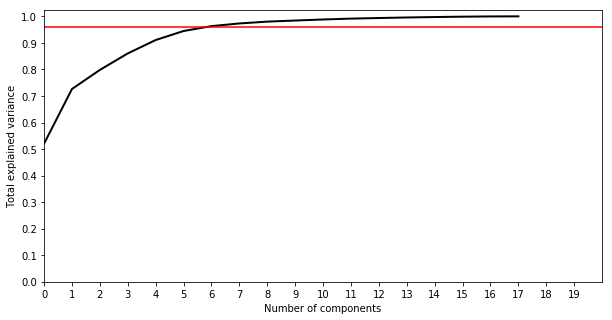

In [31]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 20)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xticks(np.arange(0, 20, 1))
plt.axvline(21, c='b')
plt.axhline(0.96, c='r')
plt.show()

### we can consider 7 PCA features, as the variance captured by 7 fetures is more than 95%

In [32]:
# creating PCA classifier with 7 components, which covers 95% variance
pca_clf = PCA(n_components=7)
pca_clf.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Use Support vector machines and use grid search and find out the best hyperparameters and do cross-validation to find the accuracy.

In [33]:
# Building a Support Vector Machine 
svc_model = SVC(random_state=97, gamma=1)

In [34]:
#setting parameters for GridSearchCV
parameters = {'C':[0.01, 0.05, 0.5,1],
              'kernel':('linear', 'rbf'),
              'degree':[1, 2, 3, 4, 5]
             }
# creating GridSearchCV classifier using SVM model, setting cross-validation limit to 15
clf = GridSearchCV(svc_model, parameters, cv=15)

In [35]:
# Fitting X_train, y_train data to GridSearchCV classifier
clf.fit(pca.transform(X_train), y_train.values.ravel())

C:\Users\npand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=15, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=97, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.05, 0.5, 1], 'kernel': ('linear', 'rbf'), 'degree': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
print ('Best parameters detected for SVM classifiers using Grid Search CV are ')
print (clf.best_params_)

Best parameters detected for SVM classifiers using Grid Search CV are 
{'C': 1, 'degree': 1, 'kernel': 'rbf'}


In [37]:
print ('Best score detected for SVM classifiers using Grid Search CV is ', clf.best_score_)

Best score detected for SVM classifiers using Grid Search CV is  0.964527027027027


### Building SVM model without using PCA components -----

In [38]:
svm_model = SVC(C=1, kernel='rbf', degree= 1,random_state=97, gamma=1)
svm_model.fit(X_train, y_train.values.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=97, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred = svm_model.predict(X_test)

In [40]:
# check the accuracy on the training set
print('Training accuracy using SVM model without PCA:',svm_model.score(X_train, y_train))
print('Testing accuracy using SVM model without PCA:',svm_model.score(X_test, y_test))

Training accuracy using SVM model without PCA: 0.9763513513513513
Testing accuracy using SVM model without PCA: 0.9251968503937008


### Building SVM model using 7 PCA components -----

In [41]:
model = SVC(C=1, kernel='rbf',degree= 1,random_state=97, gamma=1)
model.fit(pca_clf.transform(X_train), y_train.values.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=97, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
# check the accuracy on the training set
print('Training accuracy using SVM model with PCA components:',model.score(pca_clf.transform(X_train), y_train))
print('Testing accuracy using SVM model with PCA components:',model.score(pca_clf.transform(X_test), y_test))

Training accuracy using SVM model with PCA components: 0.9391891891891891
Testing accuracy using SVM model with PCA components: 0.9212598425196851
